<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

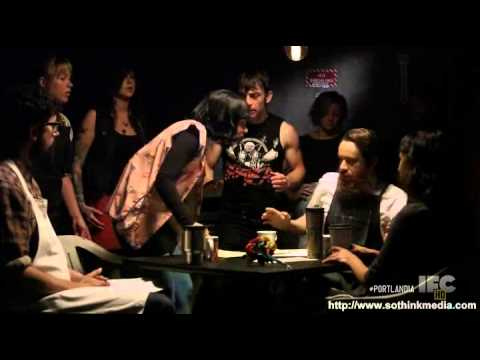

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/cs/nlp/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['rating'] = shops['star_rating'].apply(lambda x: x[:4]).astype('float')

In [5]:
shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops['review'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,date,review
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,11/25/2016,Very cool decor! Good drinks Nice seating Howe...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,12/3/2016,1 check-in They are located within the Northcr...


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [7]:
sample = "To understand the heart and mind of a person, look not at what he has already achieved, but what he aspires to."

In [8]:
import spacy 
from spacy.tokenizer import Tokenizer # redundancy for better association/repetition

nlp = spacy.load('en_core_web_lg')

# tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [9]:
doc = nlp(sample)

In [10]:
for token in doc:
    print(token.text)

To
understand
the
heart
and
mind
of
a
person
,
look
not
at
what
he
has
already
achieved
,
but
what
he
aspires
to
.


In [11]:
# print list of tokens
[token.text for token in tokenizer(sample)]

['To',
 'understand',
 'the',
 'heart',
 'and',
 'mind',
 'of',
 'a',
 'person,',
 'look',
 'not',
 'at',
 'what',
 'he',
 'has',
 'already',
 'achieved,',
 'but',
 'what',
 'he',
 'aspires',
 'to.']

In [12]:
# tokenizer pipe

tokens = []

# make dem tokens
for doc in tokenizer.pipe(shops['review'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [13]:
shops['tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

In [ ]:
# Analyzing Tokens section from associated lecture

In [14]:
# base python
from collections import Counter

# Counter takes an iterable, but you can instantiate an empty one and update it
word_counts = Counter()

# update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# print out the 10 most common words
word_counts.most_common(10)

[('the', 27779),
 ('and', 25748),
 ('a', 22085),
 ('I', 19780),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901),
 ('for', 8244)]

In [15]:
# let's create a function which takes a corpus of doc and returns a dataframe of word counts for us to analyze

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')
    

In [16]:
# use the function 
wc = count(shops['tokens'])

In [17]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,the,6520,27779,1.0,0.035705,0.035705,0.856092
6,and,6804,25748,2.0,0.033094,0.068799,0.893382
41,a,6181,22085,3.0,0.028386,0.097185,0.811581
3,I,5469,19780,4.0,0.025424,0.122609,0.718093
67,to,5631,16904,5.0,0.021727,0.144336,0.739364


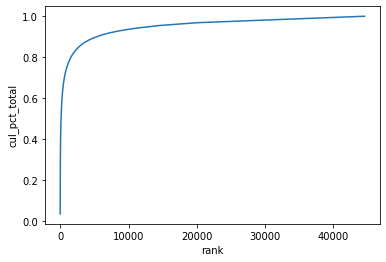

In [18]:
import seaborn as sns

# cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [19]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.475920927482584

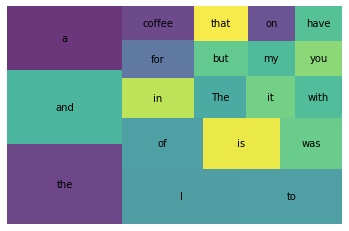

In [20]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [21]:
lemmas = []

for doc in nlp.pipe(shops['review']):
    
    d_lems = []
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            d_lems.append(token.lemma_)
    lemmas.append(d_lems)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [22]:
shops['tokens'] = lemmas

In [24]:
# groupby with rating & word 

tokens = shops['tokens']\
    .apply(pd.Series)\
    .reset_index()\
    .melt(id_vars="index")\
    .dropna()[['index', 'value']]\
    .set_index('index')

In [26]:
shops['tokens']

0       [1, check, Love, love, love, atmosphere, corne...
1       [list, Date, Night, Austin, Ambiance, Austin, ...
2       [1, check, list, Brunch, Spots, love, eclectic...
3       [cool, decor, good, drink, nice, seating, over...
4       [1, check, locate, Northcross, mall, shopping,...
                              ...                        
7611    [actually, step, restaurant, chance, favorite,...
7612    [ok, Steeping, Room, awesome, great, menu, ite...
7613    [love, come, tea, atmosphere, pretty, fresh, o...
7614    [food, average, booth, feel, clean, waitstaff,...
7615    [finally, stop, lunch, colleague, glad, delici...
Name: tokens, Length: 7616, dtype: object

In [27]:
tokens = tokens.join(shops[['rating']], how='inner')

In [28]:
tokens.head()

,value,rating
0,1,5.0
0,check,5.0
0,Love,5.0
0,love,5.0
0,love,5.0


In [29]:
word_rating = tokens.groupby('value').mean()
word_count = tokens.groupby('value').count()
words = word_rating.join(word_count, lsuffix='_mean', rsuffix='_count')


In [30]:
words.head()

,rating_mean,rating_count
value,,
"""Wait",4.000000,1
"""a",4.000000,1
"""why",5.000000,1
#2?,5.000000,1
$,3.561028,934


In [31]:
words.sort_values(by=['rating_count', 'rating_mean'], ascending=False)

,rating_mean,rating_count
value,,
coffee,4.143982,10161
place,4.123095,6036
good,4.175084,5346
great,4.368502,3924
check,4.242284,3467
...,...,...
whomp,1.000000,1
whoop,1.000000,1
wilt,1.000000,1


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

